In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

**Make sure you have the CSV file wherever you are working on this notebook!**

## Effect of 2004 Assault Weapons Ban -- Continued

In [2]:
df=pd.read_csv("firearms-combined.csv")

# Summary Statistics

Both Pandas and Numpy provide methods to calculate the average:

In [3]:
rate2005=np.array(df["RATE-2005"])
rate2014=np.array(df["RATE-2014"])
rate2005

array([16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
       14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
        7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
        8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
        6.8, 11.5,  8.8, 13.8,  8.5, 13.4])

In [4]:
rate2005.mean()

10.809999999999997

In [5]:
np.mean(rate2014)

11.44

In [6]:
diff=rate2014.mean()-rate2005.mean()
diff

0.6300000000000026

How could we conduct an experiment to determine if this difference might caused by sampling?

The null hypothesis is that there is no real difference between the two data sets, and any differences are just based on random sampling from the underlying population

So, let's assume that the two samples are from the same population. 

By combining (called **pooling**) the samples, we get a new subset of the original population, if the null hypothesis is true. Morever, any sample from this better represents the original population than either of the samples

We can whether the null hypothesis is true by checking how often samples from the pooled data set have a difference in means as large as the one observed 

**The big question**

To sample **with replacement** or **without replacement**

Sampling with replacement is called **bootstrapping** and is the most popular resampling technique. It is meant to better emulate independent sampling from the original population

Sampling without replacement better emulates permutation tests, where we check every possible reordering of the data into samples. This will be discussed more later

Generally, sampling without replacement is more conservative (produces a higher $p$-value) than bootstrapping. Bootstraping is **easy** and **most popular**, and we apply it here:

### Bootstrap Model 1

In [7]:
pooled=np.concatenate((rate2005,rate2014))

In [8]:
pooled,pooled.size

(array([16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
        14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
         7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
         8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
         6.8, 11.5,  8.8, 13.8,  8.5, 13.4, 16.9, 19.2, 13.5, 16.6,  7.4,
        12.2,  5. , 11.1, 11.5, 13.7,  2.6, 13.2,  9. , 12.4,  7.5, 11.3,
        13.9, 19. ,  9.4,  9. ,  3.2, 11.1,  6.6, 18.3, 15.3, 16.1,  9.5,
        14.8,  8.7,  5.3, 16. ,  4.2, 11.8, 12.3, 10.3, 15.7, 11.7, 10.5,
         3. , 15.5, 10.3, 15.1, 10.7, 12.3, 10.3, 10.3,  9.7, 14.6,  8.2,
        16.2]), 100)

In [9]:
npr.choice(pooled,size=50)

array([15.3, 11.1, 14.8, 11.6,  7.4, 12.3,  8.7, 10.8, 10.3, 13.8, 15.5,
       16. , 16.1, 19.2,  8.8, 16.9, 13. ,  3.2, 13.2, 13.5, 11.8, 17.5,
       14.6, 10.5, 11.2,  6.6,  5.3,  6.6,  8.8, 11.9, 16.2,  6.8, 16.9,
       15.5, 11.7, 14.1, 16. , 10. , 11.8, 10.8,  9.3, 16. , 13.8,  9.3,
       13.4, 16.9, 10.8, 14.8, 15.5, 10. ])

In [10]:
num_sims=1000
event_count=0
for sim in range(num_sims):
    sample05 = npr.choice(pooled, size=50)
    sample14 = npr.choice(pooled, size=50)
    # Bootstrap samples DO NOT have to be the same size
    # They should be the sizes of the original sample
    mean05 = sample05.mean()
    mean14 = sample14.mean()
    sample_diff = mean14-mean05
    if abs(sample_diff) >= diff:
        event_count+=1
        
print("Under the null hypothesis, observe effect this large with prob =~",event_count/num_sims,sep="")

Under the null hypothesis, observe effect this large with prob =~0.448


So the data does not support that the observed effect is statistically significant.

What are some problems with this approach?

We treated all the states in the two samples as if they were independent -- but they are measurements on the same states! That violates our assumptions. 

The states have their own firearms mortality behavior based on other factors (rural/urban, poverty rate, population density, education level, laws, etc.)


### Bootstrap Model 2

<!-- A more reasonable bootstrap approach would be to randomly assign values from 2005 or 2014 for each state and then assess the difference: -->

A more reasonable bootstrap approach would be to randomnly assign values from either 2005 or 2014 for each state and then assess the difference.

In [11]:
stacked = np.vstack((rate2005,rate2014))
stacked

array([[16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
        14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
         7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
         8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
         6.8, 11.5,  8.8, 13.8,  8.5, 13.4],
       [16.9, 19.2, 13.5, 16.6,  7.4, 12.2,  5. , 11.1, 11.5, 13.7,  2.6,
        13.2,  9. , 12.4,  7.5, 11.3, 13.9, 19. ,  9.4,  9. ,  3.2, 11.1,
         6.6, 18.3, 15.3, 16.1,  9.5, 14.8,  8.7,  5.3, 16. ,  4.2, 11.8,
        12.3, 10.3, 15.7, 11.7, 10.5,  3. , 15.5, 10.3, 15.1, 10.7, 12.3,
        10.3, 10.3,  9.7, 14.6,  8.2, 16.2]])

In [12]:
num_sims=500000
event_count=0
bs_stats = []
for sim in range(num_sims):
    sample05 = stacked[npr.randint(2,size=50),range(50)]
    sample14 = stacked[npr.randint(2,size=50),range(50)]
    # Bootstrap samples DO NOT have to be the same size
    # They should be the sizes of the original sample
    mean05 = sample05.mean()
    mean14 = sample14.mean()
    sample_diff = mean14-mean05
    bs_stats+=[sample_diff]
    if abs(sample_diff) >= diff:
        event_count+=1
        
print("Under the null hypothesis, observe effect this large with prob =~",event_count/num_sims,sep="")

Under the null hypothesis, observe effect this large with prob =~6e-05


What is the conclusion? 

The simulation supports rejecting the null hypothesis. We can assume that the effect is real: the mortality rate AFTER the assault weapons ban is higher than before.

It depends on HOW you interpret the data!

## Distribution of the bootstrap mean-difference

Every time we create a bootstrap value for the difference of means, we create a new random value. Let's see how the bootstrap means are distributed by looking at a histogram of those values:

(array([1.8000e+01, 8.1000e+01, 3.8100e+02, 1.6570e+03, 5.0270e+03,
        1.3715e+04, 2.9686e+04, 5.0624e+04, 7.2210e+04, 8.5645e+04,
        8.5346e+04, 6.7554e+04, 4.5659e+04, 2.5578e+04, 1.1216e+04,
        4.0430e+03, 1.2460e+03, 2.6300e+02, 4.4000e+01, 7.0000e+00]),
 array([-0.698 , -0.6274, -0.5568, -0.4862, -0.4156, -0.345 , -0.2744,
        -0.2038, -0.1332, -0.0626,  0.008 ,  0.0786,  0.1492,  0.2198,
         0.2904,  0.361 ,  0.4316,  0.5022,  0.5728,  0.6434,  0.714 ]),
 <a list of 20 Patch objects>)

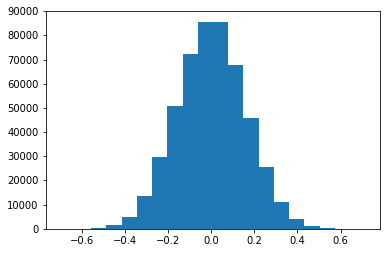

In [13]:
plt.hist(bs_stats,bins=20)

A few observations:

1. The difference of means has a bell shape -- we saw that before. Why?

2. Almost all of the values fall between -0.5 and 0.5. Not suprising that a mean-difference as large as 0.6 is very rare.


### Confidence Intervals

An alternative to specifying $p$-values is to specify **confidence intervals**. The $x$% (symmetric) confidence interval for a statistic is the region such that (100-$x)/2$% of samples will fall below the confidence interval, and (100-$x)/2$% of samples will fall above the confidence interval. 

The confidence interval for a bootstrap statistic cannot be known exactly, but it can be estimated accurately given enough samples of the bootstrap statistic

**Procedure for Estimating Confidence Interval for a Bootstrap Statistic**
1. Draw $N$ samples from the pooled data using replacement
2. For each sample(s), compute the desired statistic and store it
3. Sort all of the stored statistics
4. For confidence interval $x$%: ley y = 1-x/100
    * the lower bound of the confidence interval is the element in position $Ny/2$
    * the upper bound of the confidence interval is the element in position $N-Ny/2-1= N(1-y)/2-1$
    
    (Assuming 0-based indexing)

**Compute the 95% confidence interval for the example above**

In [14]:
bs_stats.sort()

In [15]:
lower=int(len(bs_stats)*0.05/2)
lower

12500

In [16]:
upper=int(len(bs_stats)-lower-1)
upper

487499

In [17]:
bs_stats[lower],bs_stats[upper]

(-0.3100000000000023, 0.3100000000000023)

Thus, the 95% confidence interval is [-0.30, 0.31]

Conclusion: The observed value (0.6x) falls outside of the 95% confidence interval, so we reject the null hypothesis.

**Lecture 11 Assignment**
1. Compute the 99% confidence interval for this second way of carrying out the bootstrap on the 2005/2014 firearms mortality data sets. Resample a few times and see if the confidence interval varies. How many samples are needed to get a reliable estimate of the 99% confidence interval for this statistic?
2. Compute the 95% confidence interval for the first way of carrying out the bootstrap on the 2005/2014 firearms mortality data sets. How many samples are needed to get a reliable estimate of the 95% confidence interval for this statistic?
3. Compute the 99% confidence interval for the first way of carrying out the bootstrap on the 2005/2014 firearms mortality data sets. How many samples are needed to get a reliable estimate of the 99% confidence interval for this statistic?

## 1.

In [18]:
lower=int(len(bs_stats)*0.01/2)
upper=int(len(bs_stats)-lower-1)
bs_stats[lower],bs_stats[upper]

print('The 99% confidence interval for this second way of carrying out the bootstrap is (',bs_stats[lower],',',bs_stats[upper],'), and this was achieved with 500,000 simulations.',sep="")


The 99% confidence interval for this second way of carrying out the bootstrap is (-0.4079999999999977,0.4060000000000006), and this was achieved with 500,000 simulations.


## 2.

In [19]:
num_sims=500000
event_count=0
pooled_diff = []
for sim in range(num_sims):
    sample05 = npr.choice(pooled, size=50)
    sample14 = npr.choice(pooled, size=50)
    # Bootstrap samples DO NOT have to be the same size
    # They should be the sizes of the original sample
    mean05 = sample05.mean()
    mean14 = sample14.mean()
    sample_diff = mean14-mean05
    pooled_diff += [sample_diff]
    if abs(sample_diff) >= diff:
        event_count+=1

In [20]:
pooled_diff.sort()
lower=int(len(pooled_diff)*0.05/2)
upper=int(len(pooled_diff)-lower-1)

print('The 95% confidence interval for the first way of carrying out the bootstrap is (',pooled_diff[lower],',',pooled_diff[upper],'), and this was achieved with ',num_sims,' simulations.',sep="")


The 95% confidence interval for the first way of carrying out the bootstrap is (-1.572000000000001,1.5719999999999992), and this was achieved with 500000 simulations.


## 3.

In [21]:
lower=int(len(pooled_diff)*0.01/2)
upper=int(len(pooled_diff)-lower-1)

print('The 99% confidence interval for the first way of carrying out the bootstrap is (',pooled_diff[lower],',',pooled_diff[upper],'), and this was achieved with ',num_sims,' simulations.',sep="")


The 99% confidence interval for the first way of carrying out the bootstrap is (-2.0680000000000014,2.0600000000000023), and this was achieved with 500000 simulations.


## Effect of State Laws

The column "Total Laws 2014" shows the total number of gun laws in each state as of 2014. The data is from 

https://www.statefirearmlaws.org/resources

Now we have 2 data sources that are both in 2014, but they do not represent two samples from the same population. Instead, they represent two things that may depend on each other.

Again, the first thing to do is plot the data. When we have two sets of data that may be dependent, a scatter plot is usually the first tool to reach for:

What does this data suggest?

We don't know how to measure the dependence between two data sets like this -- **yet**

Let's see if we can turn this into into two data sets:

The data seems to fall into two clusters, one with < 50 laws and one with > 50 laws. 

Finding clusterings of data is a job computers are good at.

Let's use a standard clustering algorithm to see what it find.



There are several libraries that contain clustering algorithms. 

Clustering is a type of unsupervised machine learning; unsupervised means that you do not have to have labels for any of the data

![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
The ```scikit-learn``` module has many useful methods for machine learning, including clustering

We will start with one of the simplest clustering algorithms:

The $K$-Means Algorithm is a randomized, iterative algorithm to cluster data. We will need to put the data into colums of a matrix as follows:

Now let's partition the data accordingly:

**Note that less50 is a pandas series object. It also has a mean method, as well as other useful summary statistics**

Again, if we want to perform a binary hypothesis test, we need to pool the data and draw representative samples from it:

What is your conclusion?

What are some issues with this analysis?